# Modelo Básico de Inmunología
### Daniel Yedra Cázares
### Facultad de Ciencias, UNAM


## Tabla de contenidos:
[1. Introducción](#introduction)

[2. Funciónes de estimulación y cooperación](#FG)

[3. Clase PE ](#EM)


## Introducción

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.integrate import solve_ivp
import math
from scipy.optimize import newton
from numpy.linalg import eigvals, eig
from scipy.optimize import brentq

## Funciónes de estimulación y cooperación

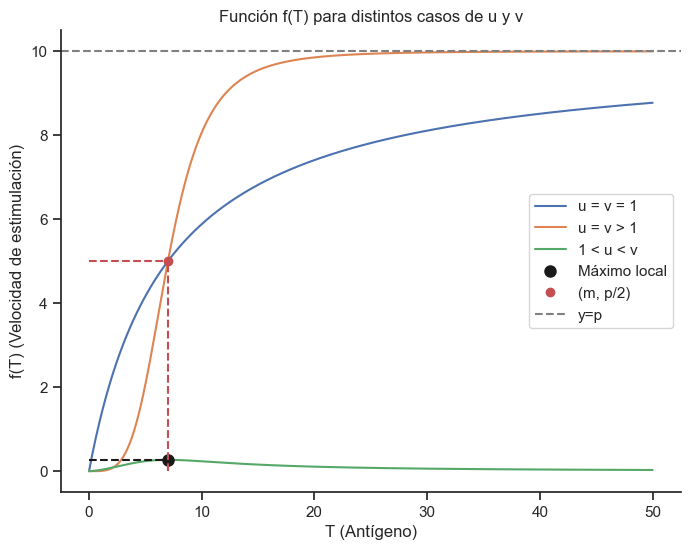

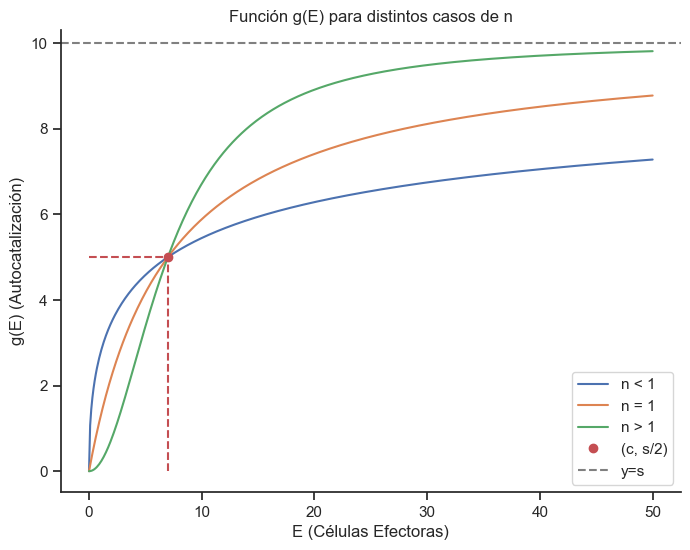

In [6]:
sns.set(style='ticks')

# Definir la función f(T) = p * T^u / (m^v + T^v)
def f_T(T, p, u, v, m):
    return p * (T**u) / (m**v + T**v)

# Definir la función g(E) = s * E^n / (C^n + E^n)
def g_E(E, s, n, C):
    return s * (E**n) / (C**n + E**n)

# Rango de valores para T y E
T_values = np.linspace(0, 50, 500)
E_values = np.linspace(0, 50, 500)

# Parámetros para f(T)
p = 10
m = 7
# Casos para f(T):
# (a) u = v = 1; (b) u = v > 1; (c) 1 < u < v
cases_fT = [
    {"u": 1,   "v": 1, "label": "u = v = 1"},
    {"u": 4,   "v": 4, "label": "u = v > 1"},
    {"u": 1.5, "v": 3, "label": "1 < u < v"}
]

# Parámetros para g(E)
s = 10
C = 7
# Casos para g(E):
# (a) n < 1; (b) n = 1; (c) n > 1
cases_gE = [
    {"n": 0.5, "label": "n < 1"},
    {"n": 1,   "label": "n = 1"},
    {"n": 2,   "label": "n > 1"}
]

# Graficar f(T)
fig, ax = plt.subplots(figsize=(8, 6))
for case in cases_fT:
    ax.plot(T_values, f_T(T_values, p, case["u"], case["v"], m), label=case["label"])
    
    # Si es el caso 1 < u < v, calcular y marcar el máximo local
    if case["u"] == 1.5 and case["v"] == 3:
        T_dense = np.linspace(0, 10, 1000)
        f_dense = f_T(T_dense, p, case["u"], case["v"], m)
        max_index = np.argmax(f_dense)
        T_max = T_dense[max_index]
        f_max = f_dense[max_index]
        ax.plot(T_max, f_max, 'ko', markersize=8, label="Máximo local")
        # Dibujar segmentos punteados desde el máximo a los ejes
        ax.plot([T_max, T_max], [0, f_max], 'k--')
        ax.plot([0, T_max], [f_max, f_max], 'k--')

# Dibujar el punto (m, p/2)
ax.plot(m, p/2, 'ro',label="(m, p/2)")
# Dibujar la recta horizontal punteada en y = p
ax.axhline(y=p, color='gray', linestyle='--', label="y=p")
# Dibujar segmentos punteados que unan (m, p/2) con los ejes
ax.plot([m, m], [0, p/2], 'r--')
ax.plot([0, m], [p/2, p/2], 'r--')

ax.set_title("Función f(T) para distintos casos de u y v")
ax.set_xlabel("T (Antígeno)")
ax.set_ylabel("f(T) (Velocidad de estimulación)")
ax.legend()
sns.despine(ax=ax, offset=0)
plt.show()

# Graficar g(E)
fig, ax = plt.subplots(figsize=(8, 6))
for case in cases_gE:
    ax.plot(E_values, g_E(E_values, s, case["n"], C), label=case["label"])

# Dibujar el punto (C, s/2)
ax.plot(C, s/2, 'ro',label="(c, s/2)")
# Dibujar segmentos punteados que unan (C, s/2) con los ejes
ax.plot([C, C], [0, s/2], 'r--')
ax.plot([0, C], [s/2, s/2], 'r--')
ax.axhline(y=s, color='gray', linestyle='--', label="y=s")

ax.set_title("Función g(E) para distintos casos de n")
ax.set_xlabel("E (Células Efectoras)")
ax.set_ylabel("g(E) (Autocatalización)")
ax.legend()
sns.despine(ax=ax, offset=0)
plt.show()

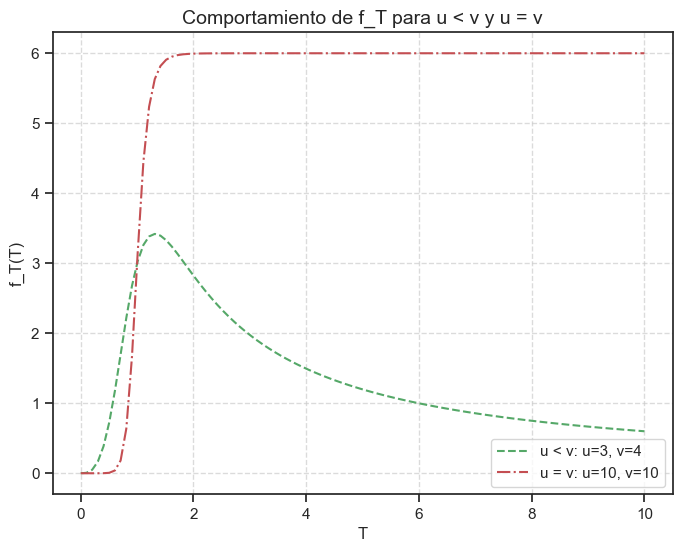

In [4]:
# Definir la función f_T con m=1
def f_T(T, p, u, v):
    m = 1  # Asumiendo que m = 1
    return p * (T**u) / (m**v + T**v)

# Parámetros a evaluar
p = 6      # Ejemplo de valor para p
T_values = np.linspace(0, 10, 100)  # Rango de valores para T

# Caso 1: u < v
u2, v2 = 3, 4
f_values_2 = f_T(T_values, p, u2, v2)

# Caso 2: u = v
u3, v3 = 10, 10
f_values_3 = f_T(T_values, p, u3, v3)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(T_values, f_values_2, label=f'u < v: u={u2}, v={v2}', linestyle='--', color='g')
plt.plot(T_values, f_values_3, label=f'u = v: u={u3}, v={v3}', linestyle='-.', color='r')

# Agregar detalles a la gráfica
plt.title('Comportamiento de f_T para u < v y u = v', fontsize=14)
plt.xlabel('T', fontsize=12)
plt.ylabel('f_T(T)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

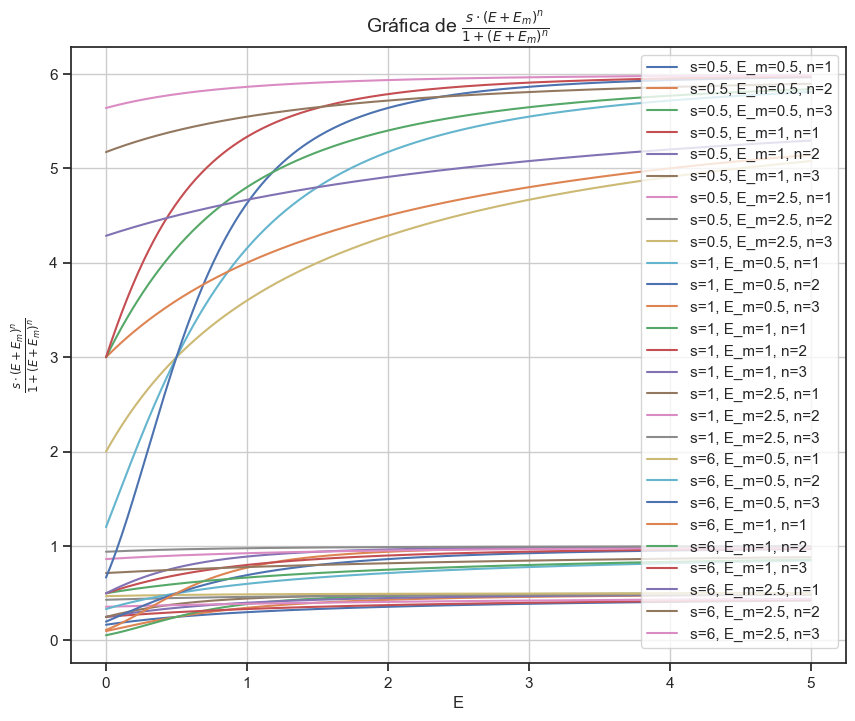

In [5]:
# Definir la función
def func(E, s, E_m, n):
    return s * (E + E_m)**n / (1 + (E + E_m)**n)

# Parámetros a probar
E_vals = np.linspace(0, 5, 400)  # Rango de E
s_values = [0.5, 1, 6]  # Diferentes valores de s
E_m_values = [0.5, 1, 2.5]  # Diferentes valores de E_m
n_values = [1, 2, 3]  # Diferentes valores de n

# Crear la gráfica
plt.figure(figsize=(10, 8))

# Probar diferentes combinaciones de parámetros
for s in s_values:
    for E_m in E_m_values:
        for n in n_values:
            plt.plot(E_vals, func(E_vals, s, E_m, n), label=f"s={s}, E_m={E_m}, n={n}")

# Configurar la gráfica
plt.title(r'Gráfica de $\frac{s \cdot (E + E_m)^n}{1 + (E + E_m)^n}$', fontsize=14)
plt.xlabel('E', fontsize=12)
plt.ylabel(r'$\frac{s \cdot (E + E_m)^n}{1 + (E + E_m)^n}$', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Clase Punto de Equilibrio

Creamos esta clase de Puntos de equilibrio para poder ver la propiedades de estos de forma más directa usando sus métodos.

In [2]:
class PE:
    def __init__(self, tipo, r, k, p, s, u, v, n, estabilidad=None):
        self.tipo = tipo
        self.r = r
        self.k = k
        self.p = p
        self.s = s
        self.u = u
        self.v = v
        self.n = n

        if tipo == 1:
            self.descripcion = "(0, 0)"
            self.nombre = "Origen"
            self.color = "red"
            self.estabilidad = self.Estabilidad_Num()

        elif tipo == 2:
            self.descripcion = "(0, E_m)"
            self.nombre = "Equilibrio linfocitos"
            self.color = "blue"
            self.NP, self.Em = self.Num_PE()
            self.estabilidad = [self.Estabilidad_Num(e) for e in self.Em]

        elif tipo == 3:
            self.descripcion = "(T_m, r/k)"
            self.nombre = "Equilibrio coexistencia"
            self.color = "green"
            self.NP, self.Tm = self.Num_PE()
            self.estabilidad = [self.Estabilidad_Num(T=t) for t in self.Tm]

        else:
            self.descripcion = "Tipo desconocido"
            self.nombre = "N/A"
            self.color = "gray"
    

    def Num_PE(self):
        if self.tipo == 1:
            print('El origen es punto de equilibrio siempre')
    
        if self.tipo == 2:
            # Definir correctamente la ecuación
            def equation(E, s, n):
                return s *( (E ** (n - 1)) / (1 + E ** n)) - 1

            # Definir el rango de valores de E para graficar
            E_vals = np.linspace(0, 3, 1000)  # Definir un rango adecuado para E
            y_vals = equation(E_vals, self.s, self.n)
            
            # Graficar la ecuación
            plt.figure(figsize=(8, 6))
            plt.plot(E_vals, y_vals, label=f'Ecuación para s={self.s}, n={self.n}')
            plt.axhline(0, color='black', linewidth=1)  # Línea horizontal para E=0
            plt.axvline(0, color='black', linewidth=1)  # Línea vertical para E=0
            plt.xlabel('E')
            plt.ylabel('f(E)')
            plt.title(f'Gráfica de la ecuación Tipo 2')
            plt.grid(True)
            plt.legend()
            plt.show()
            
            # Imprimir los puntos de equilibrio aproximados
            # Detectar los intervalos donde la función cruza el eje E
            for i in range(len(E_vals)-1):
                if y_vals[i] * y_vals[i+1] < 0:  # Cambia de signo
                    print(f"Posible punto de equilibrio entre E={E_vals[i]:.4f} y E={E_vals[i+1]:.4f}")
    
            def find_solutions_fixed(s, n, tol=1e-6, initial_guesses=None):
                if initial_guesses is None:
                    initial_guesses = [1.0, 2.0, 3.0, 5.0]  # Agregar más puntos iniciales para buscar las soluciones
                    
                sols = []
                for guess in initial_guesses:
                    try:
                        # Utilizamos brentq con un rango de búsqueda más amplio
                        sol = brentq(equation, 1e-8, 50, args=(s, n), xtol=tol)
                        if sol > 0:  # Verificar que la solución es positiva
                            sols.append(sol)
                    except ValueError:
                        pass  # Si no se encuentra una raíz, ignoramos este intento
    
                sols = np.unique(np.round(sols, decimals=8))  # Eliminar soluciones duplicadas
                return len(sols), sorted(sols.tolist())
    
            # Intentamos con múltiples puntos iniciales directamente
            initial_guesses = [0.2,1.0, 2.0, 3.0, 5.0]  # Puntos iniciales variados
            num_sols, soluciones = find_solutions_fixed(self.s, self.n, initial_guesses=initial_guesses)

            return num_sols, soluciones
    
        if self.tipo == 3:
            def W(T, u, v, beta):
                return T**u - beta * (T**v) - beta
    
            def calculate_a(r_tilde, k_tilde, s_tilde, n):
                term1 = r_tilde / k_tilde
                term2 = s_tilde * (term1 ** n) / (1 + term1 ** n)
                return term1 - term2
    
            a = calculate_a(self.r, self.k, self.s, self.n)
            beta = a / self.p
    
            def equation(T, beta, u, v):
                return (T ** u) / (1 + T ** v) - beta
    
            def find_solutions_T(beta, u, v, tol=1e-6, initial_guesses=None):
                if initial_guesses is None:
                    initial_guesses = [1.0, 2.0, 3.0, 5.0]  # Puntos iniciales predeterminados para buscar soluciones
    
                sols = []
                for guess in initial_guesses:
                    try:
                        # Utilizamos brentq con un rango de búsqueda más amplio
                        sol = brentq(equation, 1e-8, 50, args=(beta, u, v), xtol=tol)
                        if sol > 0:  # Verificar que la solución es positiva
                            sols.append(sol)
                    except ValueError:
                        pass  # Si no se encuentra una raíz, ignoramos este intento
    
                sols = np.unique(np.round(sols, decimals=8))  # Eliminar soluciones duplicadas
                return len(sols), sorted(sols.tolist())
    
            # Intentamos con múltiples puntos iniciales directamente
            initial_guesses = [1.0, 2.0, 3.0, 5.0]  # Puntos iniciales variados
            num_sols, soluciones = find_solutions_T(beta, self.u, self.v, initial_guesses=initial_guesses)
    
            return num_sols, soluciones

    def Estabilidad_Num(self, E=None, T=None):
        def jacobian(T_star, E_star):
            df1_dT = self.r - self.k * E_star
            df1_dE = -self.k * T_star
            df2_dT = self.p * self.u * T_star ** (self.u - 1) if T_star > 0 else 0
            df2_dE = self.s * (self.n * E_star ** (self.n - 1) * (1 + E_star ** self.n) - self.n * E_star ** (self.n - 1) * E_star ** self.n) / (1 + E_star ** self.n) ** 2 - 1
            return np.array([[df1_dT, df1_dE], [df2_dT, df2_dE]])
    
        def clasificar_por_valores_propios(eigenvals):
            reales = [np.real(e) for e in eigenvals]
            imaginarios = [np.imag(e) for e in eigenvals]
            if all(r < 0 for r in reales) and any(i != 0 for i in imaginarios):
                return "Foco estable"
            elif all(r > 0 for r in reales) and any(i != 0 for i in imaginarios):
                return "Foco inestable"
            elif all(r == 0 for r in reales) and any(i != 0 for i in imaginarios):
                return "Centro"
            elif all(r < 0 for r in reales) and all(i == 0 for i in imaginarios):
                return "Nodo estable"
            elif all(r > 0 for r in reales) and all(i == 0 for i in imaginarios):
                return "Nodo inestable"
            elif any(r > 0 for r in reales) and any(r < 0 for r in reales):
                return "Punto silla"
            else:
                return "Indeterminado"
    
        # Tipo 1: origen
        if self.tipo == 1:
            if self.r < 0:
                print("Origen: Nodo estable")
                return "Nodo estable"
            elif self.r > 0:
                print("Origen: Punto silla")
                return "Punto silla"
            else:
                print("Origen: Indeterminado")
                return "Indeterminado"
    
        # Tipo 2: múltiples Em
        elif self.tipo == 2:
            resultados = []
            puntos = [E] if E is not None else self.Em
            for em in puntos:
                eigvals = np.linalg.eigvals(jacobian(0, em))
                clas = clasificar_por_valores_propios(eigvals)
                print(f"Tipo 2:(0, {em}) → Autovalores: {eigvals} → {clas}")
                resultados.append(clas)
            return resultados
    
        # Tipo 3: múltiples Tm
        elif self.tipo == 3:
            resultados = []
            puntos = [T] if T is not None else self.Tm
            for tm in puntos:
                eigvals = np.linalg.eigvals(jacobian(tm, self.r / self.k))
                clas = clasificar_por_valores_propios(eigvals)
                print(f"Tipo 3:({tm}, {self.r/self.k}) → Autovalores: {eigvals} → {clas}")
                resultados.append(clas)

            return resultados

    def simular_dinamica(self, condiciones_iniciales=None, t_span=(0, 100), mostrar_campo=True):
        def system(t, y):
            T_star, E_star = y
            dTdt = self.r * T_star - self.k * T_star * E_star
            dEdt = self.p * (T_star ** self.u) / (1 + T_star ** self.v) + \
                   self.s * (E_star ** self.n) / (1 + E_star ** self.n) - E_star
            return [dTdt, dEdt]

        if self.tipo == 1:
            condiciones_iniciales = condiciones_iniciales or [[0.01, 0.01], [0.05, 0.05], [0.1, 0.1]]
            puntos_eq = [(0, 0)]

        elif self.tipo == 2:
            condiciones_iniciales = condiciones_iniciales or [[0.01, em + 0.01] for em in self.Em]
            puntos_eq = [(0, em) for em in self.Em]

        elif self.tipo == 3:
            condiciones_iniciales = condiciones_iniciales or [
                [tm + 0.01, self.r / self.k] for tm in self.Tm
            ] + [[tm - 0.01, self.r / self.k] for tm in self.Tm]
            puntos_eq = [(tm, self.r / self.k) for tm in self.Tm]

        else:
            print("Tipo de punto de equilibrio no reconocido.")
            return

        plt.figure(figsize=(10, 5))
        for y0 in condiciones_iniciales:
            sol = solve_ivp(system, t_span, y0, method='RK45', dense_output=True)
            plt.plot(sol.t, sol.y[1], label=f'CI: {y0}')

        for T_eq, E_eq in puntos_eq:
            plt.axhline(E_eq, linestyle='--', label=f'Eq en E* = {E_eq:.4f}')

        plt.xlabel('Tiempo')
        plt.ylabel('E*')
        plt.title('Simulaci\u00f3n del sistema con diferentes condiciones iniciales')
        plt.legend()
        plt.grid()
        plt.show()

        if mostrar_campo:
            T_vals = np.linspace(0, 3, 20)
            E_vals = np.linspace(0, 3, 20)
            T, E = np.meshgrid(T_vals, E_vals)
            dT = self.r * T - self.k * T * E
            dE = self.p * (T ** self.u) / (1 + T ** self.v) + \
                 self.s * (E ** self.n) / (1 + E ** self.n) - E

            plt.figure(figsize=(8, 6))
            plt.quiver(T, E, dT, dE, color='blue', alpha=0.75)
            plt.xlabel('T*')
            plt.ylabel('E*')
            plt.title('Campo de direcciones del sistema')
            plt.xlim([0, 3])
            plt.ylim([0, 3])
            plt.grid()
            plt.show()

    def plano_fase(self, rango_T=(0, 8), rango_E=(0, 5), densidad=20):
        def system(t, y):
            T_star, E_star = y
            dTdt = self.r * T_star - self.k * T_star * E_star
            dEdt = self.p * (T_star ** self.u) / (1 + T_star ** self.v) + \
                   self.s * (E_star ** self.n) / (1 + E_star ** self.n) - E_star
            return [dTdt, dEdt]
    
        # Determinar puntos de equilibrio a graficar
        puntos_eq = []
        if self.tipo == 1:
            puntos_eq = [(0, 0)]
        elif self.tipo == 2:
            puntos_eq = [(0, em) for em in self.Em]
        elif self.tipo == 3:
            puntos_eq = [(tm, self.r / self.k) for tm in self.Tm]
    
        # Ajustar automáticamente el eje T si hay puntos cerca de T = 0
        min_T = min([t[0] for t in puntos_eq])
        if min_T < 0.3:
            rango_T = (-0.5, rango_T[1])  # Extiende la malla hacia valores negativos de T
    
        # Crear la malla de puntos (T, E) con rango actualizado
        T_vals = np.linspace(rango_T[0], rango_T[1], densidad)
        E_vals = np.linspace(rango_E[0], rango_E[1], densidad)
        T, E = np.meshgrid(T_vals, E_vals)
    
        # Calcular el campo vectorial
        dT = self.r * T - self.k * T * E
        dE = self.p * (T ** self.u) / (1 + T ** self.v) + \
             self.s * (E ** self.n) / (1 + E ** self.n) - E
    
        # Graficar el campo de direcciones
        plt.figure(figsize=(10, 6))
        plt.streamplot(T, E, dT, dE, color='blue', linewidth=1, density=1.5)
    
        # Dibujar puntos de equilibrio
        for t_eq, e_eq in puntos_eq:
            plt.plot(t_eq, e_eq, 'ro', markersize=8)
            #plt.text(t_eq + 0.1, e_eq, f'({t_eq:.2f}, {e_eq:.2f})', color='black', fontsize=10)
    
        plt.xlabel('T')
        plt.ylabel('E')
        plt.title('Plano Fase del Sistema')
        plt.grid(True)
        plt.xlim(rango_T)
        plt.ylim(rango_E)
        plt.show()
        

    def Aprox_PE_Param(self,Aprox='fsolve',GE=300,GR_C=200):
        if(self.tipo == 1):
            print('El origen siempre es punto de equilibrio')
    
        if(self.tipo == 2):
        

            tol = 1e-6  # Tolerancia para la solución

            def equation(E, s, n):
                return (s * E**(n-1) / (1 + E**n)) - 1
            
            def find_solutions(s, n, tol=tol):
            
                E_min, E_max = 1e-8, 50  # Ampliar el rango si es necesario
                E_grid = np.linspace(E_min, E_max, 3000)
                sols = []
                for i in range(len(E_grid)-1):
                    f1 = equation(E_grid[i], s, n)
                    f2 = equation(E_grid[i+1], s, n)
                    if f1 * f2 < 0:
                        E_guess = (E_grid[i] + E_grid[i+1]) / 2
                        sol = fsolve(equation, E_guess, args=(s, n))[0]
                        if sol > 0 and abs(equation(sol, s, n)) < tol:
                            sols.append(sol)
                sols = np.unique(np.round(sols, decimals=8))
                sols = sorted(sols.tolist())
                if len(sols) > 2:
                    sols = sols[:2]
                return sols
            
            def check_solutions(n_values, s_values):
            
                solution_grid = np.full((len(s_values), len(n_values)), 0)
                solution_count_grid = np.zeros((len(s_values), len(n_values)))
                
                for j, s in enumerate(s_values):
                    for i, n in enumerate(n_values):
                        sols = find_solutions(s, n)
                        num_sols = len(sols)
                        solution_count_grid[j, i] = num_sols
                        solution_grid[j, i] = num_sols
                return solution_grid, solution_count_grid
            
            # Definir rangos de parámetros.
            # Se define n_range para el eje x y s_range para el eje y.
            n_range = np.linspace(0.05, 10, GR_C)  # eje x: n
            s_range = np.linspace(0.05, 20, GR_C)    # eje y: \tilde{s}
            
            solution_grid, solution_count_grid = check_solutions(n_range, s_range)
            
            # Crear la gráfica de regiones
            plt.figure(figsize=(10, 8))
            # Como solution_grid tiene forma (len(s_range), len(n_range)), usaremos extent para:
            # x: n_range, y: s_range.
            plt.imshow(solution_grid, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
                       origin='lower', aspect='auto', cmap='viridis', alpha=0.8)
            cbar = plt.colorbar()
            cbar.set_label('Número de soluciones')
            cbar.set_ticks([0, 1, 2])
            cbar.set_ticklabels(['No hay solución', '1 solución', '2 soluciones'])
            plt.xlabel('n')
            plt.ylabel(r'$\tilde{s}$')
            plt.title('Regiones de existencia de soluciones para E')
            
            # Superponer la curva teórica para n > 1:
            # \tilde{s} = n/((n-1)^((n-1)/n))
            n_curve = np.linspace(1.01, 10, 500)
            s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
            plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
            plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
            plt.legend()
            plt.show()
            
            # Mostrar resumen de los casos encontrados:
            print(f"Casos con 0 soluciones: {np.sum(solution_count_grid == 0)}")
            print(f"Casos con 1 solución: {np.sum(solution_count_grid == 1)}")
            print(f"Casos con 2 soluciones: {np.sum(solution_count_grid == 2)}")

            if(Aprox=='fsolve'):
                
                def find_solutions(s, n):
                    # Puntos de inicio heurísticos
                    E_guesses = [s/(s+1), -s/(s+1), 1.0, -1.0, 0.5, -0.5]
                    pos_solution = None
                    neg_solution = None
                
                    for guess in E_guesses:
                        sol = fsolve(equation, guess, args=(s, n))
                        # Se verifica que el residual sea muy pequeño
                        if abs(equation(sol[0], s, n)) < tol:
                            if sol[0] > 0:
                                if pos_solution is None or abs(sol[0] - pos_solution) > tol:
                                    pos_solution = sol[0]
                            elif sol[0] < 0:
                                if neg_solution is None or abs(sol[0] - neg_solution) > tol:
                                    neg_solution = sol[0]
                    return pos_solution, neg_solution
                
                def check_solutions(s_values, n_values):

                    solution_grid = np.full((len(s_values), len(n_values)), -1)  # -1: no hay solución
                    solution_type_grid = np.full((len(s_values), len(n_values)), "No hay solución", dtype=object)
                    
                    for i, s in enumerate(s_values):
                        for j, n in enumerate(n_values):
                            pos_sol, neg_sol = find_solutions(s, n)
                            if pos_sol is not None:
                                solution_grid[i, j] = 1
                                solution_type_grid[i, j] = "Solución positiva"
                            elif neg_sol is not None:
                                solution_grid[i, j] = -2
                                solution_type_grid[i, j] = "Solución negativa"
                    return solution_grid, solution_type_grid
                
                # Definir rangos de parámetros:
                # Queremos que el eje x sea n y el eje y sea s.
                n_range = np.linspace(1.05, 20, GE)  
                s_range = np.linspace(0.05, 10, GE)  
                solutions, solution_types = check_solutions(s_range, n_range)
                
                # Crear la gráfica usando imshow (ejes intercambiados: x -> n, y -> s)
                plt.figure(figsize=(10, 8))
                # La matriz 'solutions' tiene forma (len(s_range), len(n_range)), donde la fila corresponde a s y la columna a n.
                plt.imshow(solutions, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
                           origin='lower', aspect='auto', cmap='coolwarm', alpha=0.8)
                plt.colorbar(label='1: Solución positiva, -1: No hay solución')
                plt.xlabel('n')
                plt.ylabel(r'$\tilde{s}$')
                plt.title('Regiones de existencia de soluciones para E')
                n_curve = np.linspace(1.05, 20, 400)
                s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
                plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
                #plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
                plt.legend()
                plt.show()
                
                # Mostrar información de las soluciones encontradas
                positive_positions = np.argwhere(solution_types == "Solución positiva")
                negative_positions = np.argwhere(solution_types == "Solución negativa")
                
                print(f"Soluciones positivas encontradas en {len(positive_positions)} puntos.")
                print(f"Soluciones negativas encontradas en {len(negative_positions)} puntos.")
                
                if len(positive_positions) > 0:
                    print("Algunas posiciones de soluciones positivas:")
                    for pos in positive_positions[:5]:
                        # pos[0] corresponde al índice en s_range, pos[1] al índice en n_range
                        print(f"s = {s_range[pos[0]]:.3f}, n = {n_range[pos[1]]:.3f}")
                
                if len(negative_positions) > 0:
                    print("Algunas posiciones de soluciones negativas:")
                    for pos in negative_positions[:5]:
                        print(f"s = {s_range[pos[0]]:.3f}, n = {n_range[pos[1]]:.3f}")

            if(Aprox=='Newton'):

                tol = 1e-6  # Tolerancia para validar la solución
                
                def equation_derivative(E, s, n):
                    return s * ((n-1) * E**(n-2) * (1 + E**n) - n * E**(2*n-2)) / (1 + E**n)**2
                
                def dynamic_initial_guess(s, n):
                    if s < 1:
                        return s / n  # Pequeño si s es pequeño
                    elif s > 10:
                        return 10 / s  # Disminuir si s es grande
                    else:
                        return 1  # Valor neutro para la mayoría de los casos
                
                def find_solutions(s, n):
                    E_guess = dynamic_initial_guess(s, n)
                    try:
                        E_positive = newton(equation, E_guess, fprime=equation_derivative, args=(s, n))
                        if abs(equation(E_positive, s, n)) < tol and E_positive > 0:
                            return E_positive
                    except:
                        pass
                    return None
                
                def check_solutions(s_values, n_values):
                
                    # La matriz tendrá forma (# s, # n)
                    solution_grid = np.full((len(s_values), len(n_values)), -1)  # -1 = No hay solución
                    solution_type_grid = np.full((len(s_values), len(n_values)), "No hay solución", dtype=object)
                
                    for i, s in enumerate(s_values):
                        for j, n in enumerate(n_values):
                            pos_sol = find_solutions(s, n)
                            if pos_sol is not None:
                                solution_grid[i, j] = 1  # Solución positiva
                                solution_type_grid[i, j] = "Solución positiva"
                
                    return solution_grid, solution_type_grid
                
                # Definir rangos de parámetros:
                # Eje x: n; eje y: s (o \tilde{s})
                n_range = np.linspace(1.05, 20, GE)  
                s_range = np.linspace(0.05, 10, GE)  
                
                solutions, solution_types = check_solutions(s_range, n_range)
                
                # Crear la gráfica de regiones.
                plt.figure(figsize=(10, 8))
                # La matriz solutions tiene forma (# s, # n) => filas: s, columnas: n.
                plt.imshow(solutions, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
                           origin='lower', aspect='auto', cmap='coolwarm', alpha=0.8)
                cbar = plt.colorbar()
                cbar.set_label('Número de soluciones (1: Solución, -1: No hay solución)')
                cbar.set_ticks([-1, 1])
                cbar.set_ticklabels(['No hay solución', 'Solución '])
                plt.xlabel('n')
                plt.ylabel(r'$\tilde{s}$')
                plt.title('Regiones de existencia de soluciones para E')
                # Superponer la curva teórica para n > 1:
                # \tilde{s} = n/((n-1)^((n-1)/n))
                n_curve = np.linspace(1.05, 10, 300)
                s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
                plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
                #plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
                plt.legend()
                plt.show()
                
        if(self.tipo==3):

            # Calcular a y beta
            def calculate_a(r_tilde, k_tilde, s_tilde, n):
                term1 = r_tilde / k_tilde
                term2 = s_tilde * (term1 ** n) / (1 + term1 ** n)
                a = term1 - term2
                return a
            
            a = calculate_a(r_tilde=self.r, k_tilde=self.k, s_tilde=self.s, n=self.n)
            beta = a / self.p
            
            # Definir la ecuación para graficar
            def equation(T, beta, u, v):
                return (T ** u) / (1 + T ** v) - beta

            # Método para encontrar la raíz usando fsolve
            def solve_with_fsolve(beta, u, v, initial_guess=1.0):
                solution = fsolve(equation, initial_guess, args=(beta, u, v))
                return solution[0]
            
            def solve_with_newton(beta, u, v, initial_guess=1.0, tol=1e-6, max_iter=100):
                try:
                    # Intentamos encontrar la raíz con un mayor control sobre la tolerancia y las iteraciones
                    solution = newton(equation, initial_guess, args=(beta, u, v), tol=tol, maxiter=max_iter)
                    return solution
                except Exception as e:
                    print(f"Error al encontrar la raíz: {e}")
                    return None
            
            if(Aprox=='fsolve'):
                # Usando fsolve
                root_fsolve = solve_with_fsolve(beta, self.u, self.v)
                print(f"Raíz encontrada con fsolve: {root_fsolve}")
                
            if(Aprox=='Newton'):
                # Usando newton
                root_newton = solve_with_newton(beta, self.u, self.v, initial_guess=1.0, tol=1e-6, max_iter=100)
                if root_newton is not None:
                    print(f"Raíz encontrada con Newton: {root_newton}")
                else:
                    print("No se encontró una raíz.")
            
            # Crear una serie de valores de T
            T_vals = np.linspace(0.1, 20, 200)  # Rango de valores de T para la gráfica
            
            # Calcular el valor de la ecuación para cada valor de T
            equation_vals = equation(T_vals, beta, self.u, self.v)
            
            # Graficar la ecuación
            plt.figure(figsize=(8, 6))
            plt.plot(T_vals, equation_vals, label=r'$\frac{T^u}{1+T^v} - \beta$', color='blue')
            plt.axhline(0, color='black',linewidth=1)  # Línea horizontal en y=0
            plt.axvline(0, color='black',linewidth=1)  # Línea vertical en x=0
            plt.title('Gráfica de la ecuación $(T^u)/(1 + T^v) - \\beta$')
            plt.xlabel('T ')
            plt.ylabel('F(T)')
            plt.grid(True)
            plt.legend()
            plt.show()

    def Condiciones_estabilidad(self):

        if(self.tipo==1):
            
            if self.r < 0:
                print("El punto (0,0) cumple las condiciónes para ser punto estable")
            elif self.r > 0:
                print('El punto (0,0) cumple las condiciónes para ser punto silla')
            else:
                print('El comportamiento del punto (0,0) es indeterminado')
            

        if(self.tipo==2):

            for e in self.Em:
                if(e>self.r/self.k and math.sqrt(self.s * self.n * e**(self.n - 1))-e**(self.n)):
                    print('El punto (0,Em) cumple las condiciónes para ser punto estable')


        if(self.tipo==3):

            for t in self.Tm:
                
                c=self.k * t *(self.p*((self.u*t**(self.u-1))*(1+t**(self.v))-self.v*(t**(self.u))*(t**(self.v-1)))/(1+(t**self.v))**2)
                b=(self.s*(self.n*(self.r/self.k)**(self.n-1))/(1+(self.r/self.k)**self.n)**2)-1
                
                if(c<=0):
                    print('El punto (T_m,r/k) cumple las condiciónes para ser punto estable')   
                    
                if(c>=0 and b**2 > 4*c):
                    print('El punto (T_m,r/k) cumple las condiciónes para ser punto inestable')     
                    
                if(c>=0 and b**2 < 4*c and b<0):
                    print('El punto (T_m,r/k) cumple las condiciónes para ser Foco estable')   
                    
                if(c>=0 and b**2 < 4*c and b>0):
                    print('El punto (T_m,r/k) cumple las condiciónes para ser Foco inestable')    

    def Condiciones_NS(self):

        if(self.tipo==1):
            print('El Origen siempre es Punto de equilibrio, solo cambia de estabilidad')

        if(self.tipo==2):

            if(self.n<=1):
                print('Algebraicamente hay un único punto (0,Em)')

            if(self.n>1):
                
                # Crear un gráfico para mostrar las ecuaciones en LaTeX
                plt.figure(figsize=(4, 2))
                
                # Usar LaTeX en el texto del gráfico
                plt.text(0.5, 0.8, r'El valor de $\tilde{s}$ es: ' + f'{self.s}', fontsize=14, ha='center')
                plt.text(0.5, 0.6, r'El valor de $\frac{n}{\sqrt[n]{{(n-1)}^{n-1}}}$ es: ' + 
                         f'{self.n/((self.n-1)**(self.n-1))**(1/self.n)}', fontsize=14, ha='center')
                
                # Configurar el gráfico
                plt.axis('off')
                plt.show()
    
                sns.set(style='ticks')
            
                # Definir la función f(n) = n / ((n-1)^((n-1)/n))
                def f(n):
                    return n / ((n - 1) ** ((n - 1) / n))
                    
                    # Definir los rangos para n y s
                n_vals = np.linspace(1.01, 20, 500)  # n > 1
                s_vals = np.linspace(0, 10, 500)     # s abarca desde 0 hasta algo mayor al máximo de f(n)
            
                # Crear la malla
                N, S = np.meshgrid(n_vals, s_vals)
            
                # Evaluamos f(n) para obtener F
                F = f(N)
                    
                # Definir la diferencia: diff = s - f(n)
                diff = S - F
            
                # Crear la gráfica de regiones con colores
                plt.figure(figsize=(8, 6))
                levels = [-10, 0, 20]  # Diferentes niveles para regiones
                contour = plt.contourf(N, S, diff, levels=levels, colors=['lightblue', 'lightcoral'], alpha=0.6)
                    
                # Dibujar la curva (nivel 0)
                contour_line = plt.contour(N, S, diff, levels=[0], colors='black', linewidths=2)
            
                plt.xlabel(r'$n$')
                plt.ylabel(r'$\tilde{s}$')
                plt.title(r'Regiones en el plano $(n, \tilde{s})$ Algebraicamente')
                sns.despine(offset=0)
                    
                # Mostrar la gráfica
                plt.tight_layout()
                # Agregar anotaciones para las regiones
                plt.text(2, 0.5, r'$\tilde{s} < \frac{n}{\sqrt[n]{(n-1)^{\,n-1}}}$ (0 soluciones)', color='blue')
                plt.text(7.5, 4.5, r'$\tilde{s} > \frac{n}{\sqrt[n]{(n-1)^{\,n-1}}}$ (2 soluciones)', color='red')
                plt.show()
    
                if(self.s>self.n/((self.n-1)**(self.n-1))**(1/self.n)):
                    return 2
                    
                if(self.s==self.n/((self.n-1)**(self.n-1))**(1/self.n)):
                    return 1
                    
                if(self.s<self.n/((self.n-1)**(self.n-1))**(1/self.n)):
                    return 0            

        if(self.tipo==3):
            def calculate_a(r_tilde, k_tilde, s_tilde, n):
                term1 = r_tilde / k_tilde
                term2 = s_tilde * (term1 ** n) / (1 + term1 ** n)
                return term1 - term2
            
            # Función para calcular 'beta'
            def calculate_beta(a, p_tilde):
                return a / p_tilde

            # Función W
            def W(T, u, v, beta):
                return T**u - beta * (T**v) - beta
                
            def Num_Sol_T(beta, u, v):
                if beta > 0:
                    if u > v:
                        Te = (beta * v / u) ** (1 / (u - v))
                        We = W(Te, u, v, beta)
                        if We < 0:
                            print('Algebraicamente hay 1 punto de Eq. (r/k,T_m)')
                            return 1
                        elif We > 0:
                            print('Algebraicamente no hay punto de Eq. (r/k,T_m) ')
                            return 0
                        elif We == 0:
                            print('Algebraicamente hay 2 punto de Eq. (r/k,T_m)')
                            return 2
                    elif u < v:
                        Te = (u / (beta * v)) ** (1 / (v - u))
                        We = W(Te, u, v, beta)
                        if We < 0:
                            print('Algebraicamente no hay punto de Eq. (r/k,T_m) ')
                            return 0
                        elif We > 0:
                            print('Algebraicamente hay 2 punto de Eq. (r/k,T_m)')
                            return 2
                        elif We == 0:
                            print('Algebraicamente hay 1 punto de Eq. (r/k,T_m)')
                            return 1
                    elif u == v:
                        if beta < 1:
                            print('Algebraicamente hay 1 punto de Eq. (r/k,T_m)')
                            return 1
                        elif beta >= 1:
                            print('Algebraicamente no hay punto de Eq. (r/k,T_m) ')
                            return 0
                else:
                    print('Algebraicamente no hay punto de Eq. (r/k,T_m)')
                    return 0

            a = calculate_a(r_tilde=self.r, k_tilde=self.k, s_tilde=self.s, n=self.n)
            beta = calculate_beta(a, self.p)

            Num_Sol_T(beta,u=self.u,v=self.v)



            

            

### Inicialización de objeto punto de equilibrio.

Para determinar un punto de equilibrio, es necesario especificar los parámetros del sistema, así como el tipo de punto de equilibrio correspondiente:

1. Tipo 1: Origen (0,0): Representa un punto de equilibrio en el cual tanto la población de células objetivo como la de células inmunológicas es cero.

2. Tipo 2: Estado Inmune (0, E_m): Este punto de equilibrio describe una situación en la que las células inmunológicas alcanzan un nivel constante E_m, mientras que las células objetivo mueren.

3. Tipo 3: Equilibrio (T_m, r/k): Corresponde a un punto de equilibrio en el que se mantienen valores constantes tanto para las células objetivo T_m, como para la relación r/k, representando un equilibrio dinámico entre el crecimiento del virus y la respuesta del sistema inmune.

### Tipos de estabilidad

#### Punto (0,Em) estable y (0,0) inestable

Origen: Punto silla


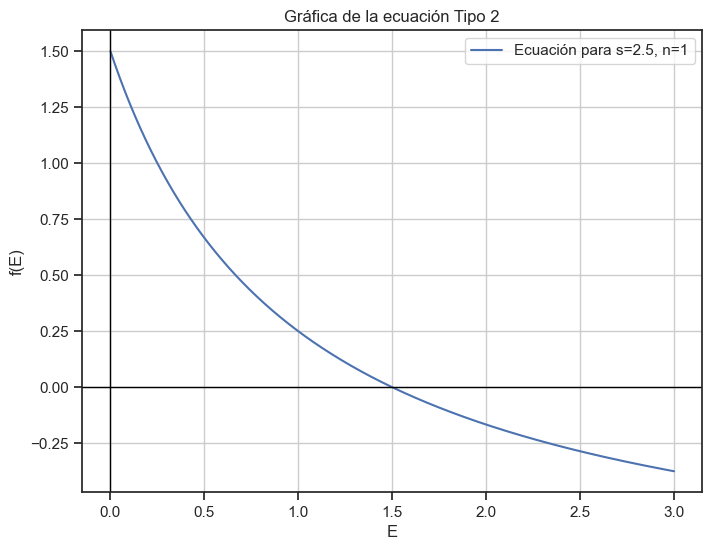

Posible punto de equilibrio entre E=1.4985 y E=1.5015
Tipo 2:(0, 1.50000001) → Autovalores: [-0.70000002 -0.6       ] → Nodo estable


In [59]:
#Creamos los 3 puntos de equilibrio para este caso

P0=PE(tipo=1 ,r=2.3,k=2,p=1,s=2.5,u=1,v=1,n=1)
P1=PE(tipo=2 ,r=2.3,k=2,p=1,s=2.5,u=1,v=1,n=1)
P2=PE(tipo=3 ,r=2.3,k=2,p=1,s=2.5,u=1,v=1,n=1)

In [66]:
#Checamos las condiciones algebraicas de existencia
print('Condiciónes Algebraicas de Existencia: ')
P0.Condiciones_NS()
P1.Condiciones_NS()
P2.Condiciones_NS()

#Condiciones algebraicas de estabilidad
print('Condiciónes Algebraicas de Estabilidad: ')
P0.Condiciones_estabilidad()
P1.Condiciones_estabilidad()
P2.Condiciones_estabilidad()

Condiciónes Algebraicas de Existencia: 
El Origen siempre es Punto de equilibrio, solo cambia de estabilidad
Algebraicamente hay un único punto (0,Em)
Algebraicamente no hay punto de Eq. (r/k,T_m)
Condiciónes Algebraicas de Estabilidad: 
El punto (0,0) cumple las condiciónes para ser punto silla
El punto (0,Em) cumple las condiciónes para ser punto estable


Según los métodos previos, se ha determinado que el origen corresponde a un punto silla. En cuanto al tipo 2, se sabe que existen una solucion; sin embargo, para mayor información ver el documento. Por otro lado, para la combinación actual de parámetros, no se ha detectado la existencia de soluciones para el tipo 3.

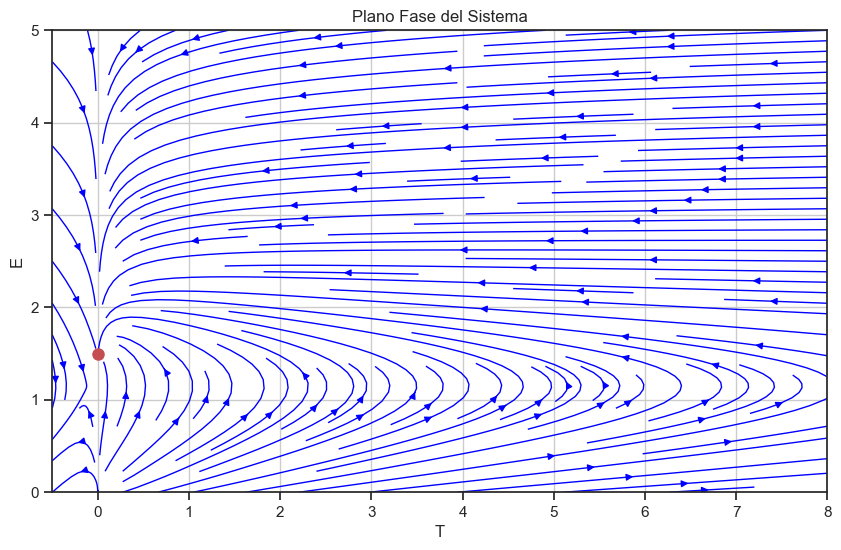

In [61]:
P1.plano_fase()

Otro métodos importantes son los siguientes:

/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:310: RuntimeWarning: invalid value encountered in power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:322: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(equation, E_guess, args=(s, n))[0]


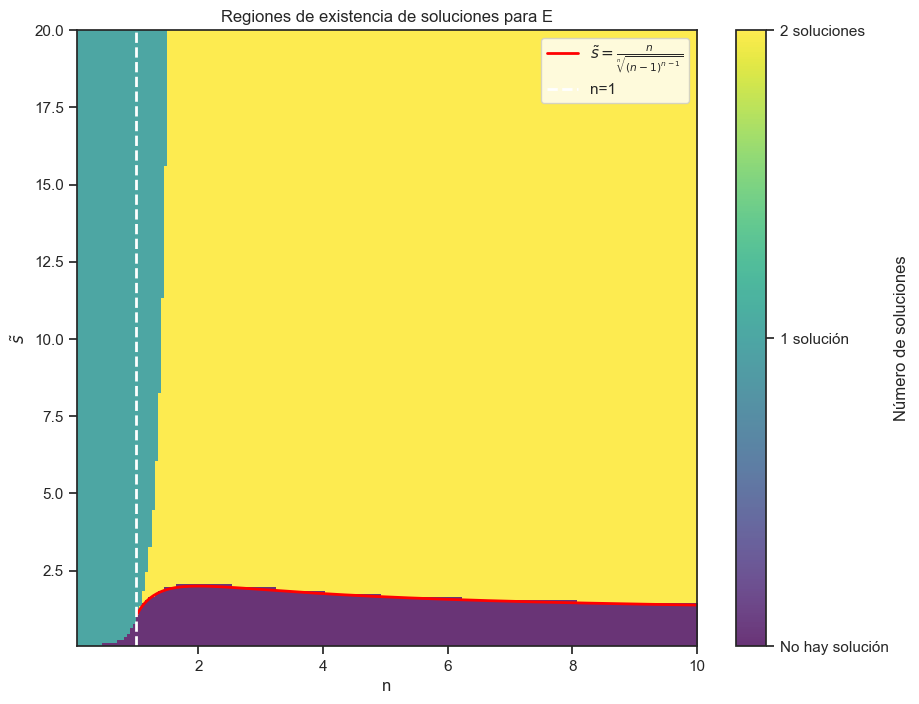

Casos con 0 soluciones: 2978
Casos con 1 solución: 5219
Casos con 2 soluciones: 31803


/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:310: RuntimeWarning: invalid value encountered in power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:388: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(equation, guess, args=(s, n))
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:310: RuntimeWarning: invalid value encountered in scalar power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_1118/3691904426.py:388: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  sol = fsolve(equation, guess, args=(s, n))


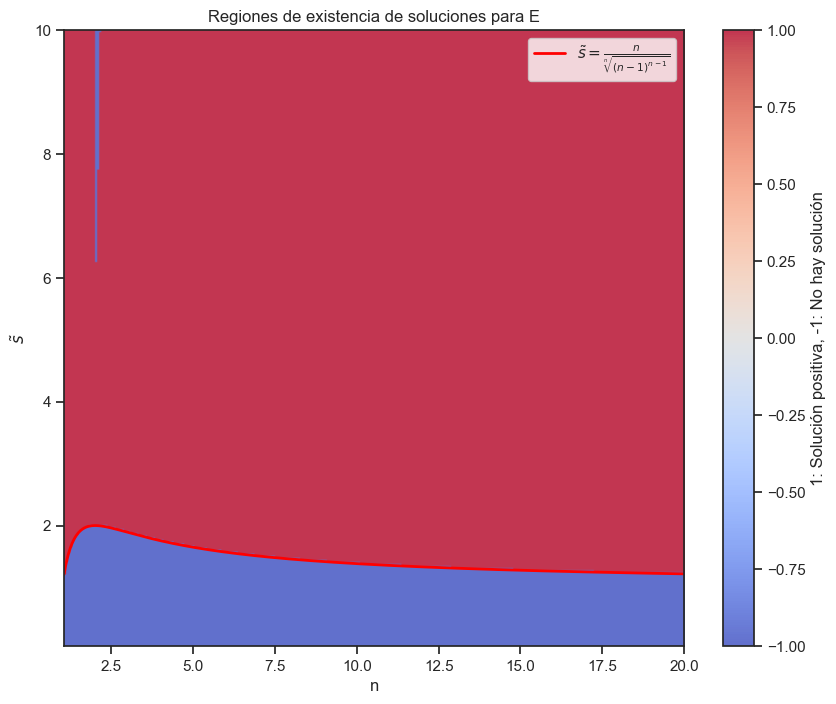

Soluciones positivas encontradas en 77034 puntos.
Soluciones negativas encontradas en 0 puntos.
Algunas posiciones de soluciones positivas:
s = 1.215, n = 1.050
s = 1.248, n = 1.050
s = 1.248, n = 17.275
s = 1.248, n = 17.338
s = 1.248, n = 17.402


In [62]:
P1.Aprox_PE_Param(Aprox='fsolve',GE=300,GR_C=200) #Con GR_C=500 se tiene la gráfica del documento

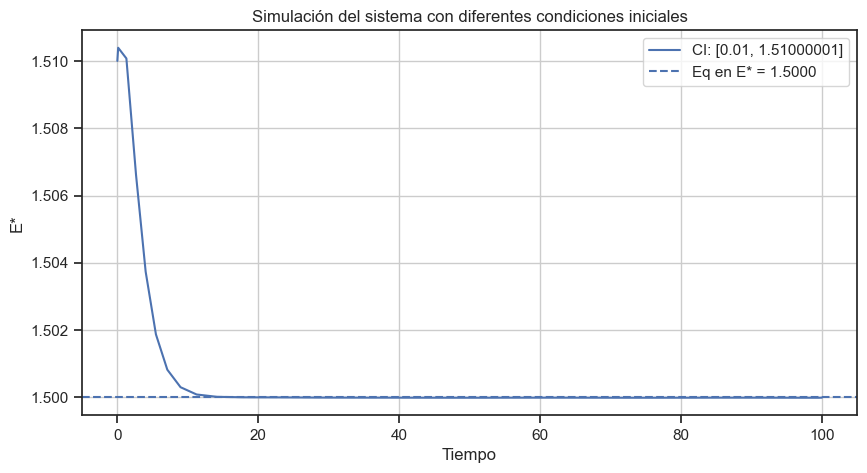

In [64]:
P1.simular_dinamica(mostrar_campo=False)

#### Punto (T_m,r/k)  Foco estable y (0,0) inestable

Origen: Punto silla


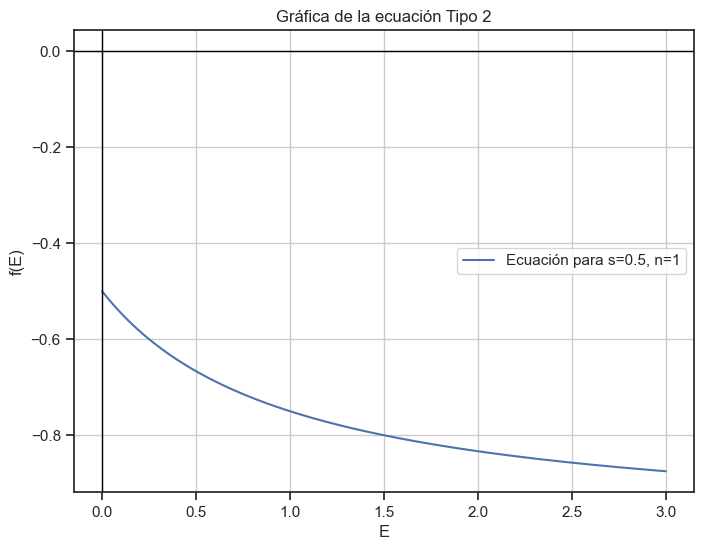

Tipo 3:(0.81649649, 1.5) → Autovalores: [-0.46+3.43342356j -0.46-3.43342356j] → Foco estable


In [70]:
#Creamos los 3 puntos de equilibrio para este caso

P0_2=PE(tipo=1 ,r=4.5,k=3,p=3,s=0.5,u=2,v=2,n=1)
P1_2=PE(tipo=2 ,r=4.5,k=3,p=3,s=0.5,u=2,v=2,n=1)
P2_2=PE(tipo=3 ,r=4.5,k=3,p=3,s=0.5,u=2,v=2,n=1)

In [71]:
#Checamos las condiciones algebraicas de existencia
print('Condiciónes Algebraicas de Existencia: ')
P0_2.Condiciones_NS()
P1_2.Condiciones_NS()
P2_2.Condiciones_NS()

#Condiciones algebraicas de estabilidad
print('Condiciónes Algebraicas de Estabilidad: ')
P0_2.Condiciones_estabilidad()
P1_2.Condiciones_estabilidad()
P2_2.Condiciones_estabilidad()

Condiciónes Algebraicas de Existencia: 
El Origen siempre es Punto de equilibrio, solo cambia de estabilidad
Algebraicamente hay un único punto (0,Em)
Algebraicamente hay 1 punto de Eq. (r/k,T_m)
Condiciónes Algebraicas de Estabilidad: 
El punto (0,0) cumple las condiciónes para ser punto silla
El punto (T_m,r/k) cumple las condiciónes para ser Foco estable


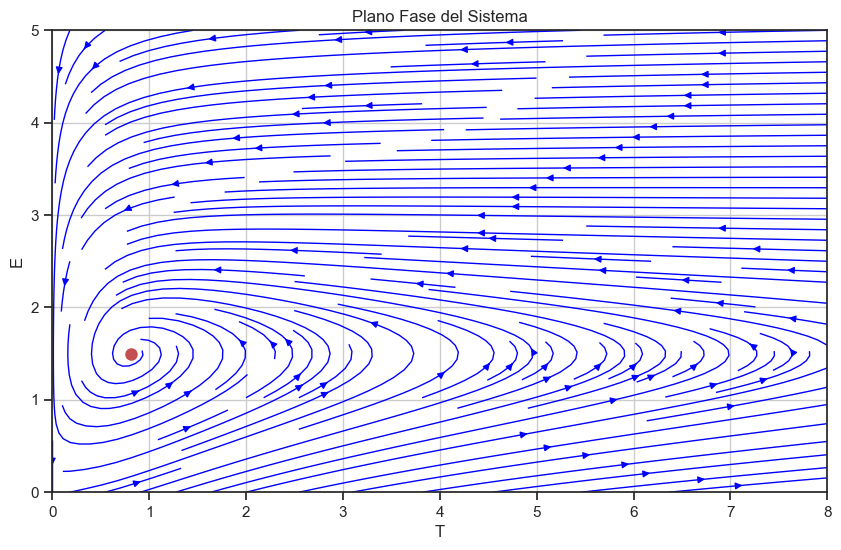

In [72]:
P2_2.plano_fase()

#### Punto (0,Em) estable y existencia de separatriz

Origen: Punto silla


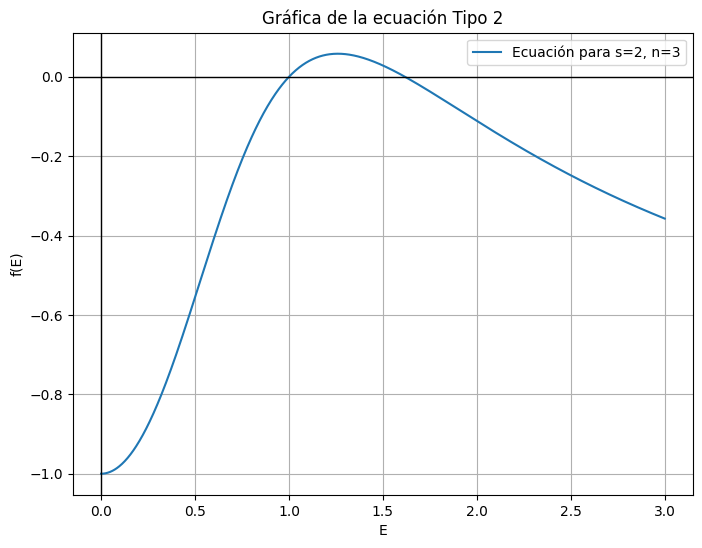

Posible punto de equilibrio entre E=1.6156 y E=1.6186


In [3]:
#Creamos los 3 puntos de equilibrio para este caso

P0_3=PE(tipo=1 ,r=0.15,k=0.1,p=0.7,s=2,u=1,v=2,n=3)
P1_3=PE(tipo=2 ,r=0.15,k=0.1,p=0.7,s=2,u=1,v=2,n=3)
P2_3=PE(tipo=3 ,r=0.15,k=0.1,p=0.7,s=2,u=1,v=2,n=3)

Condiciónes Algebraicas de Existencia: 
El Origen siempre es Punto de equilibrio, solo cambia de estabilidad


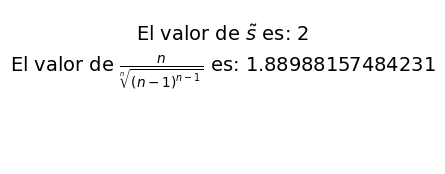

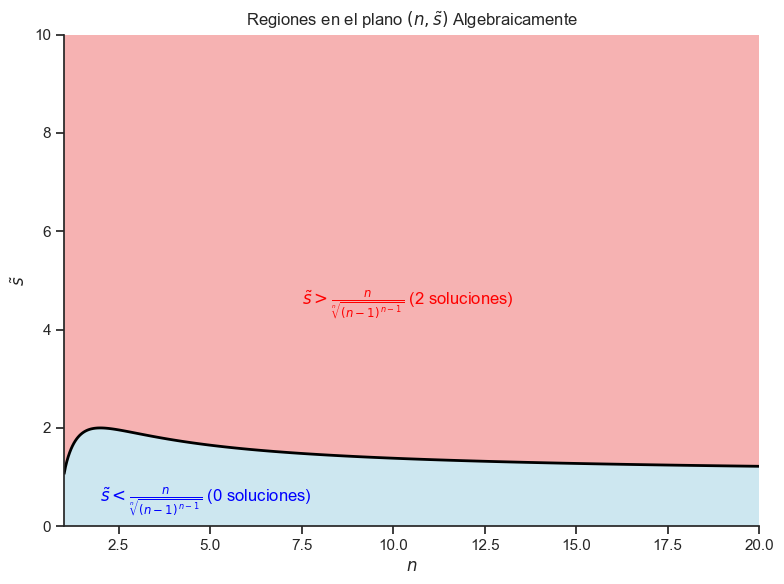

Algebraicamente no hay punto de Eq. (r/k,T_m)
Condiciónes Algebraicas de Estabilidad: 
El punto (0,0) cumple las condiciónes para ser punto silla


In [4]:
#Checamos las condiciones algebraicas de existencia
print('Condiciónes Algebraicas de Existencia: ')
P0_3.Condiciones_NS()
P1_3.Condiciones_NS()
P2_3.Condiciones_NS()

#Condiciones algebraicas de estabilidad
print('Condiciónes Algebraicas de Estabilidad: ')
P0_3.Condiciones_estabilidad()
P1_3.Condiciones_estabilidad()
P2_3.Condiciones_estabilidad()

In [7]:
P1_3.Em

[]

#### Ciclo Límite alrededor del punto $P_E=(r/k,T_m)$

Origen: Punto silla


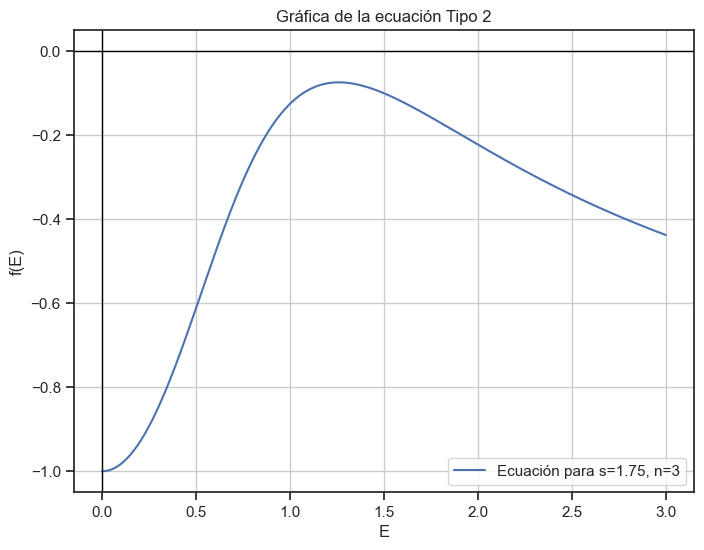

Tipo 3:(1.6192659, 0.5) → Autovalores: [0.01851852+3.10236306j 0.01851852-3.10236306j] → Foco inestable


In [8]:
#Creamos los 3 puntos de equilibrio para este caso
P0_4=PE(tipo=1 ,r=0.5,k=1,p=0.35,s=1.75,u=4,v=4,n=3)
P1_4=PE(tipo=2 ,r=0.5,k=1,p=0.35,s=1.75,u=4,v=4,n=3)
P2_4=PE(tipo=3 ,r=0.5,k=1,p=0.35,s=1.75,u=4,v=4,n=3)

Condiciónes Algebraicas de Existencia: 
El Origen siempre es Punto de equilibrio, solo cambia de estabilidad


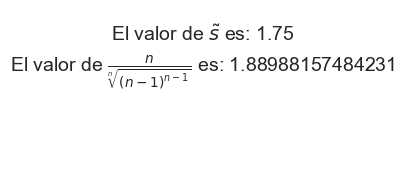

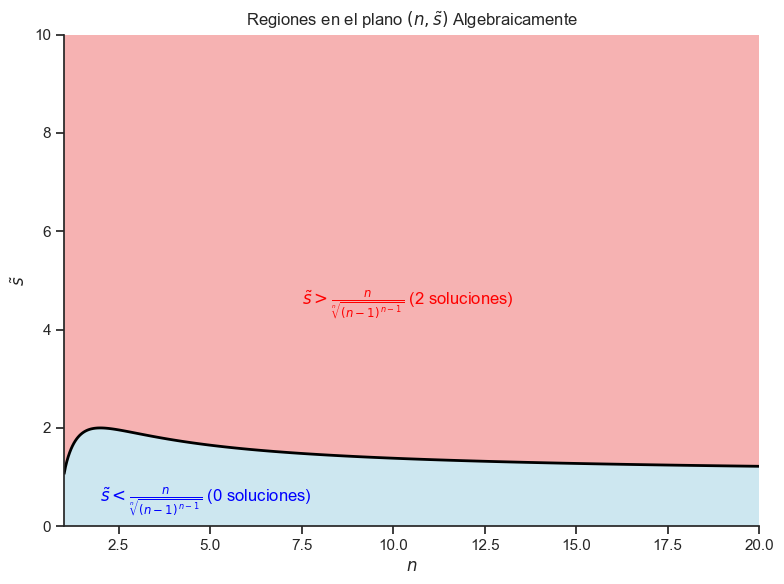

Algebraicamente hay 1 punto de Eq. (r/k,T_m)
Condiciónes Algebraicas de Estabilidad: 
El punto (0,0) cumple las condiciónes para ser punto silla
El punto (T_m,r/k) cumple las condiciónes para ser Foco inestable


In [9]:
#Checamos las condiciones algebraicas de existencia
print('Condiciónes Algebraicas de Existencia: ')
P0_4.Condiciones_NS()
P1_4.Condiciones_NS()
P2_4.Condiciones_NS()

#Condiciones algebraicas de estabilidad
print('Condiciónes Algebraicas de Estabilidad: ')
P0_4.Condiciones_estabilidad()
P1_4.Condiciones_estabilidad()
P2_4.Condiciones_estabilidad()

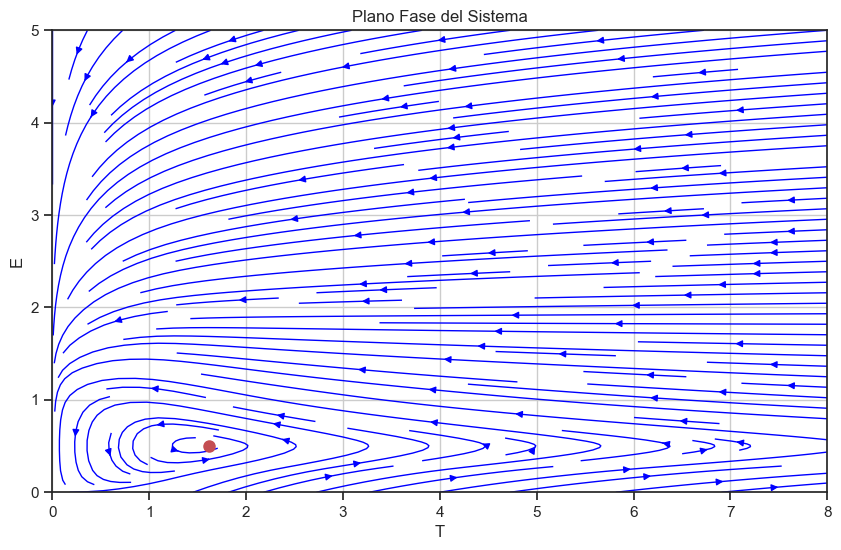

In [10]:
P2_4.plano_fase()

#### Foco estable local para el punto $(r/k,T_m)$ y nodo estable local para el punto $(0,E_m)$

Origen: Punto silla


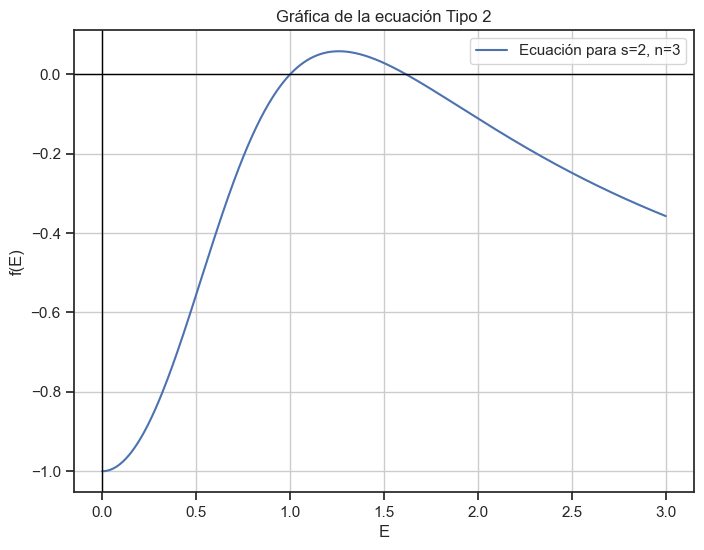

Posible punto de equilibrio entre E=1.6156 y E=1.6186


In [11]:
#Creamos los 3 puntos de equilibrio para este caso
P0_5=PE(tipo=1 ,r=0.3,k=1,p=0.7,s=2,u=1,v=2,n=3)
P1_5=PE(tipo=2 ,r=0.3,k=1,p=0.7,s=2,u=1,v=2,n=3)
P2_5=PE(tipo=3 ,r=0.3,k=1,p=0.7,s=2,u=1,v=2,n=3)

Condiciónes Algebraicas de Existencia: 
El Origen siempre es Punto de equilibrio, solo cambia de estabilidad


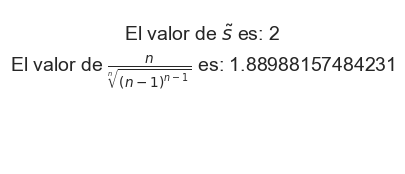

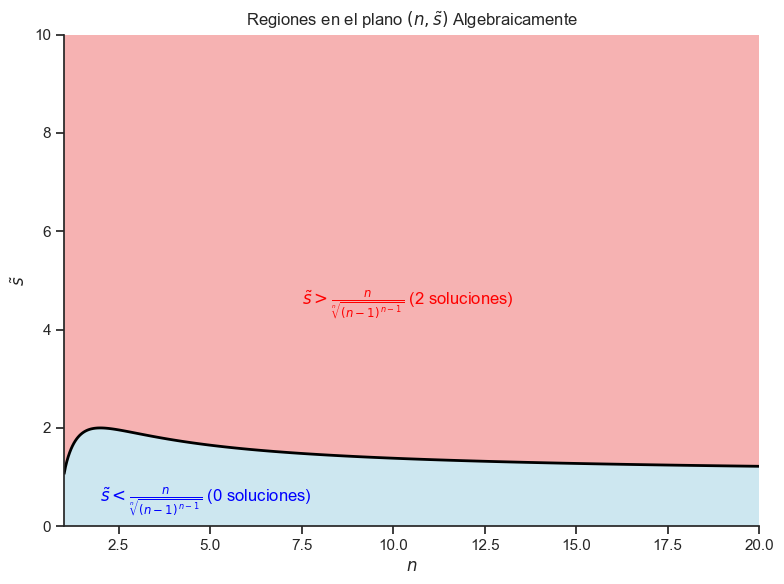

Algebraicamente hay 2 punto de Eq. (r/k,T_m)
Condiciónes Algebraicas de Estabilidad: 
El punto (0,0) cumple las condiciónes para ser punto silla


In [12]:
#Checamos las condiciones algebraicas de existencia
print('Condiciónes Algebraicas de Existencia: ')
P0_5.Condiciones_NS()
P1_5.Condiciones_NS()
P2_5.Condiciones_NS()

#Condiciones algebraicas de estabilidad
print('Condiciónes Algebraicas de Estabilidad: ')
P0_5.Condiciones_estabilidad()
P1_5.Condiciones_estabilidad()
P2_5.Condiciones_estabilidad()